# Дипломная работа по курсу «Python для анализа данных»

In [6]:
#Импорт библиотек
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
%matplotlib inline

# 1.Загрузить файл hr.csv.

In [7]:
hr = pd.read_csv('hr.csv')

## Описание датасета:
1. satisfaction_level: уровень удовлетворенности работника (безразмерная переменная от 0 до 1); 
2. last_evaluation: время с момента последней оценки (год);
3. number_project: номер или кол-во выполненных проектов;
4. average_monthly_hours: среднее кол-во часов в месяц;
5. time_spend_company: стаж работы в компании (год);
6. Work_accident: несчастный случай на работе (безразмерная переменная от 0 до 1);
7. left: увольнение работника (безразмерная переменная от 0 до 1);
8. promotion_last_5years: повышение сотрудника за последние 5 лет (безразмерная переменная от 0 до 1);
9. sales: отдел, в котором работает сотрудник;
10. salary: заработная плата (качественная переменная)

In [8]:
hr.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [9]:
#Размер датасета
len(hr.index)

14999

In [10]:
hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [11]:
#Проверка пропусков значений 
hr.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

## Выводы:
Датасет состоит из 14999 строк по сотрудникам компании (действующим и уволенным) с разделением по отделам, уровню ЗП и тд. Первые два столбца (satisfaction_level и last_evaluation) содержат вещественные числа двойной точности. Столбцы с number_project по promotion_last_5years состоят из целых чисел. Столбцы sales и salary состоят из объектов. Проверка пропусков показала их отсутствие - датасет пригоден для статистической обработки.

# 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [12]:
import statistics

Расчет основных статистических метрик:
1. mean - среднее арифметическое;
2. std - среднеквадратичное отклонение;
3. min - минимальное значение;
4. max - максимальное значение;
5. 50% - медиана (50% квантиль)
   

In [13]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [14]:
#Расчет моды
hr.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Команды для обособленных расчетов статистических метрик:
#hr.mean(); hr.std(); hr.max(); hr.min(); hr.median()

## Выводы:
Исходя из анализа полученнных метрик:
1. Компания работает на рынке 10 лет;
2. Уровень удовлетворенности сотрудников выше 0.5 - это говорит преимуществено о положительной оценке компании. Однако, высокое значение сред. отклонения и низкого значения моды свидетельствуют о том, что результаты крайне разнородны по сотрудникам - часть сотрудников компания полностью устраивает, а часть очень недовольна её работой;
3. Не реже 1 раза в год работа всех сотрудников оценивается компанией;
4. Большинство сотрудников компании работает по графику 5/2 с 8 часовым рабочим днем;
5. Высокое значение несчастных случаев на работе - у более чем 14% сотрудников зафиксированы инциденты;
6. Всего чуть более 2% сотрудников получили повышение в последние 5 лет

# 3.Рассчитать и визуализировать корреляционную матрицу для переменных

In [16]:
#Вычисление корреляционной матрицы
corr_matrix = hr.corr().round(3)
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000,0.105,-0.143,-0.020,-0.101,0.059,-0.388,0.026
last_evaluation,0.105,1.000,0.349,0.340,0.132,-0.007,0.007,-0.009
number_project,-0.143,0.349,1.000,0.417,0.197,-0.005,0.024,-0.006
average_montly_hours,-0.020,0.340,0.417,1.000,0.128,-0.010,0.071,-0.004
time_spend_company,-0.101,0.132,0.197,0.128,1.000,0.002,0.145,0.067
Work_accident,0.059,-0.007,-0.005,-0.010,0.002,1.000,-0.155,0.039
left,-0.388,0.007,0.024,0.071,0.145,-0.155,1.000,-0.062
promotion_last_5years,0.026,-0.009,-0.006,-0.004,0.067,0.039,-0.062,1.000


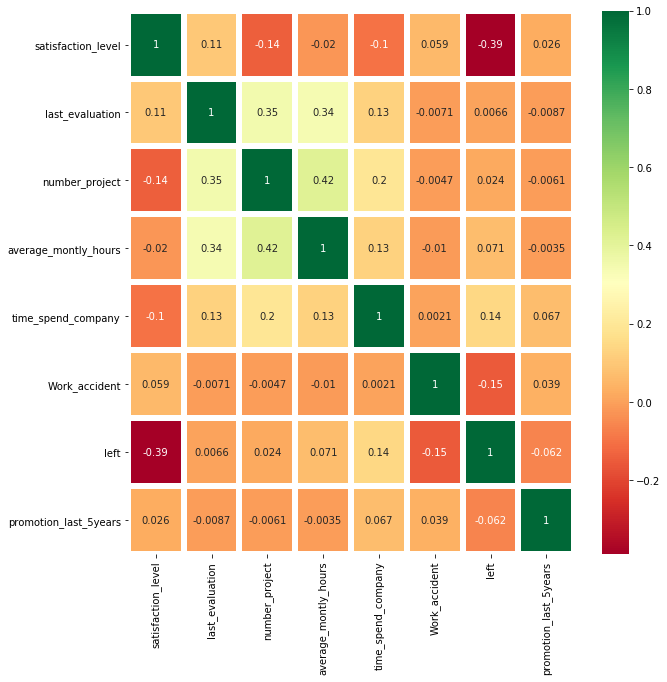

In [17]:
#Визуализация корреляционной матрицы
import seaborn as sns
sns.heatmap(hr.corr(),annot=True,cmap='RdYlGn',linewidths=5) 
fig=plt.gcf()
fig.set_size_inches(10,10)              # размер матрицы
plt.show()

## Выводы:
Наибольшие коэффициенты корреляции отмечены в парах:
1. "Кол-во проектов - Кол-во часов в месяц": коэффициент корреляции 0,42;
2. "Кол-во часов в месяц - Время с момента последней оценки ": коэффициент корреляции 0,34;
3. "Кол-во проектов - Время с момента последней оценки ": коэффициент корреляции 0,35;
4. Отрицательная корреляция между "Уровень удовлетворенности работника - Увольнение" (коэф. -0,39).

Чем больше у сотрудника проектов и выше уровень нагрузки, тем позднее его оценивает компания (в рамках одного года). Чем ниже уровень удовлетворенности, тем выше вероятность увольнения. Полученные значения коэффициентов корреляции говорят о том, что корреляционная зависимость переменных далека от линейной.

# 4.Визуализировать несколько взаимосвязей между переменными.

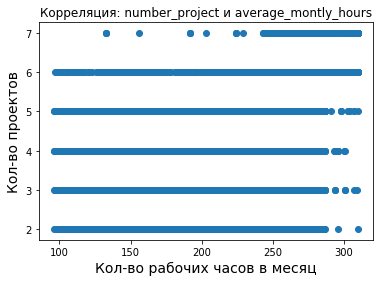

In [18]:
#Зависимость "Кол-во проектов - Кол-во часов в месяц"
plt.scatter(hr.average_montly_hours, hr.number_project)
plt.xlabel('Кол-во рабочих часов в месяц', size = 14)
plt.ylabel('Кол-во проектов', size = 14)
plt.title('Корреляция: number_project и average_montly_hours', size = 12)
plt.show()

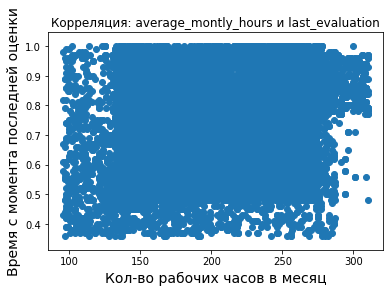

In [19]:
#Зависимость "Кол-во часов в месяц - Время с момента последней оценки"
plt.scatter(hr.average_montly_hours, hr.last_evaluation)
plt.xlabel('Кол-во рабочих часов в месяц', size = 14)
plt.ylabel('Время с момента последней оценки', size = 14)
plt.title('Корреляция: average_montly_hours и last_evaluation', size = 12)
plt.show()

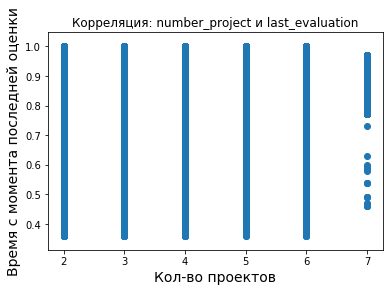

In [20]:
#Зависимость "Кол-во проектов - Время с момента последней оценки"
plt.scatter(hr.number_project, hr.last_evaluation)
plt.xlabel('Кол-во проектов', size = 14)
plt.ylabel('Время с момента последней оценки', size = 14)
plt.title('Корреляция: number_project и last_evaluation', size = 12)
plt.show()

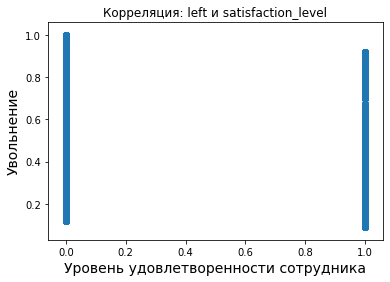

In [21]:
#Зависимость "Уровень удовлетворенности работника - Увольнение"
plt.scatter(hr.left, hr.satisfaction_level)
plt.xlabel('Уровень удовлетворенности сотрудника', size = 14)
plt.ylabel('Увольнение', size = 14)
plt.title('Корреляция: left и satisfaction_level', size = 12)
plt.show()

## Выводы:
Полученная визуалиация подтвердила ранее сделанный вывод о низком уровне линейной коррекляции переменных

# 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [22]:
#Зависимость "Кол-во проектов - Кол-во часов в месяц"
stats.ttest_ind(hr.average_montly_hours, hr.number_project)

Ttest_indResult(statistic=483.54229603425085, pvalue=0.0)

In [23]:
#Зависимость "Кол-во часов в месяц - Время с момента последней оценки"
stats.ttest_ind(hr.average_montly_hours, hr.last_evaluation)

Ttest_indResult(statistic=491.25647025928, pvalue=0.0)

In [24]:
#Зависимость "Кол-во проектов - Время с момента последней оценки"
stats.ttest_ind(hr.number_project, hr.last_evaluation)

Ttest_indResult(statistic=303.8042100031241, pvalue=0.0)

In [25]:
#Зависимость "Уровень удовлетворенности работника - Увольнение"
stats.ttest_ind(hr.satisfaction_level, hr.left)


Ttest_indResult(statistic=93.06077566920372, pvalue=0.0)

## Выводы:
Нулевые значения pvalue говорят об отсутсвии статистической взаимосвязи между переменными

# 6.Рассчитать сколько работников работает в каждом департаменте.

In [26]:
#Общее кол-во сотрудников по отделам (уволенные + работающие)
hr['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [27]:
#Действующие сотрудники компании по отделам
hr[hr['left']==0]['sales'].value_counts()

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: sales, dtype: int64

In [28]:
#Уволенные сотрудники компании по отделам
hr[hr['left']==1]['sales'].value_counts()

sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: sales, dtype: int64

## Выводы:
Максимальная численность сотрудников в отделах sales, technical и support. Исходя из распределения сотрудников по отделам, можно предположить, что компания занимается разработкой, технической поддержкой и самостоятельной продажей собственного продукта. 

# 7.Показать распределение сотрудников по зарплатам.

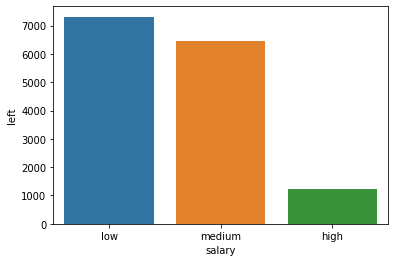

In [29]:
#Распределение зарплат по всем сотрудникам
sns.barplot(x ='salary', y ='left', data = hr, estimator = len)

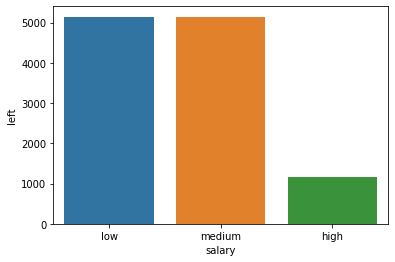

In [30]:
#Распределение зарплат по действующим сотрудникам
sns.barplot(x ='salary', y ='left', data = hr[hr['left'] == 0], estimator = len)

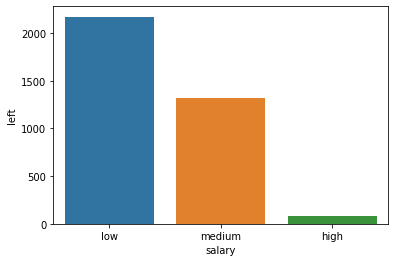

In [31]:
#Распределение зарплат по уволенным сотрудникам
sns.barplot(x ='salary', y ='left', data = hr[hr['left'] == 1], estimator = len)

## Выводы:
Низкий и средний уровень ЗП имеют "одинаковое" кол-во действующих сотрудников. Были уволены (или уволились) преимущественно сотрудники, имеющие низкий уровень ЗП, что следует из сравнения вышестоящих диаграмм.

# 8.Показать распределение сотрудников по зарплатам совместно с департаментами.

Text(0, 0.5, 'Кол-во сотрудников')

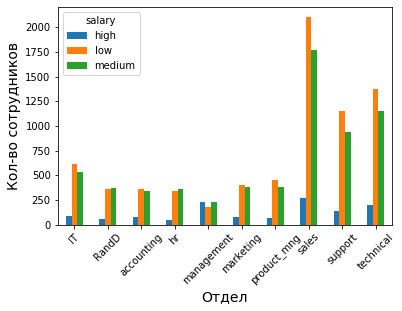

In [32]:
#Распределение зарплат по отделам для всех сотрудников
salary_1 = hr.groupby(['sales', 'salary'])['satisfaction_level'].count()
salary_1.unstack().plot(kind='bar', rot=45, stacked=False)
plt.xlabel('Отдел', size = 14)
plt.ylabel('Кол-во сотрудников', size = 14)

Text(0, 0.5, 'Кол-во сотрудников')

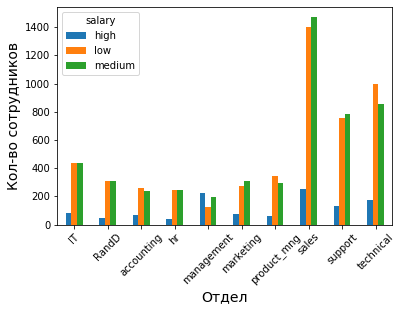

In [33]:
#Распределение зарплат по отделам для действующих сотрудников
salary_2 = hr[hr['left'] == 0].groupby(['sales', 'salary'])['satisfaction_level'].count()
salary_2.unstack().plot(kind='bar', rot=45, stacked=False)
plt.xlabel('Отдел', size = 14)
plt.ylabel('Кол-во сотрудников', size = 14)

Text(0, 0.5, 'Кол-во сотрудников')

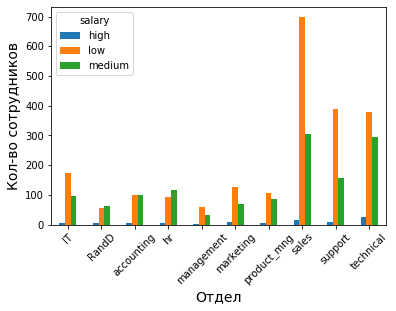

In [34]:
#Распределение зарплат по отделам для уволенных сотрудников
salary_3 = hr[hr['left'] == 1].groupby(['sales', 'salary'])['satisfaction_level'].count()
salary_3.unstack().plot(kind='bar', rot=45, stacked=False)
plt.xlabel('Отдел', size = 14)
plt.ylabel('Кол-во сотрудников', size = 14)

In [35]:
#Числовое распределение по действующим сотрудникам
print(salary_2)

sales        salary
IT           high        79
             low        437
             medium     438
RandD        high        47
             low        309
             medium     310
accounting   high        69
             low        259
             medium     235
hr           high        39
             low        243
             medium     242
management   high       224
             low        121
             medium     194
marketing    high        71
             low        276
             medium     308
product_mng  high        62
             low        346
             medium     296
sales        high       255
             low       1402
             medium    1469
support      high       133
             low        757
             medium     784
technical    high       176
             low        994
             medium     853
Name: satisfaction_level, dtype: int64


## Выводы:
Наибольшее кол-во высокооплачиваемых сотрудников работают в отделах sales, technical, support (наиболее крупные отделы) и management. Большая часть сотрудников отделов sales и support имеют ЗП на уровне medium, а отдел technical - low.  Отдел management (самый малочисленный отдел) имеет самый высокий процент сотрудников с ЗП high - кол-во сотрудников с ЗП high превышает кол-во сотрудников с ЗП low и medium. Это единственный подобный отдел в компании. Из компании ушли или были увелены, преимущественно, низкооплачиваемые сотрудники из отделов sales, technical, support. Наряду с этим, отдел technical лишился сравнительно большего кол-ва сотрудников с ЗП high.

# 9.Сколько сотрудников покинули компанию.

In [36]:
hr['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

## Выводы:
За всё время компанию покинуло 3571 сотрудник. Текущий штат 11428 сотрудников.

# 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [37]:
import researchpy as rp

### Гипотеза: Сотрудники с ЗП low увольняются чаще

In [38]:
hr.loc[ (hr.salary.isin(['low'])), 'salary' ] = 0
hr.loc[ (hr.salary.isin(['medium'])), 'salary' ] = 5
hr.loc[ (hr.salary.isin(['high'])), 'salary' ] = 10

satisfaction = hr[hr['salary'] >= 5]['left']
no_satisfaction = hr[hr['salary'] < 5]['left']
descriptives, results = rp.ttest(satisfaction, no_satisfaction)
print(descriptives)
print('_____________________________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0      left   7683.0  0.182090  0.385944  0.004403   0.173459  0.190722
1      left   7316.0  0.296884  0.456916  0.005342   0.286412  0.307355
2  combined  14999.0  0.238083  0.425924  0.003478   0.231266  0.244899
_____________________________
            Independent t-test     results
0  Difference (left - left) =      -0.1148
1        Degrees of freedom =   14997.0000
2                         t =     -16.6501
3     Two side test p value =       0.0000
4    Difference < 0 p value =       0.0000
5    Difference > 0 p value =       1.0000
6                 Cohen's d =      -0.2720
7                 Hedge's g =      -0.2720
8             Glass's delta =      -0.2974
9                         r =       0.1347


### Выводы:
Гипотеза верна - сотрудники с ЗП low увольняются (или их увольняют) чаще.

### Гипотеза: Сотрудники без повышения увольняются чаще

In [41]:
descriptives, results = rp.ttest(hr[hr['promotion_last_5years']==1]['left'], hr[hr['promotion_last_5years']==0]['left'])
print(descriptives)
print('_____________________________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0      left    319.0  0.059561  0.237044  0.013272   0.033449  0.085673
1      left  14680.0  0.241962  0.428286  0.003535   0.235033  0.248891
2  combined  14999.0  0.238083  0.425924  0.003478   0.231266  0.244899
_____________________________
            Independent t-test     results
0  Difference (left - left) =      -0.1824
1        Degrees of freedom =   14997.0000
2                         t =      -7.5812
3     Two side test p value =       0.0000
4    Difference < 0 p value =       0.0000
5    Difference > 0 p value =       1.0000
6                 Cohen's d =      -0.4291
7                 Hedge's g =      -0.4290
8             Glass's delta =      -0.7695
9                         r =       0.0618


### Выводы:
Гипотеза верна - сотрудники с без повышения увольняются (или их увольняют) чаще.